Resources : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# Synthetic Minority Oversampling technique SMOTE

### What SMOTE done?

- Create more features for minority classes, better than just duplicate them.


### It is suggested that...
    - first use random undersampling to trim the number of examples in the majority class,
    - then use SMOTE to oversample the minority class to balance the class distribution.

- *A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.*

In [7]:
import imblearn
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

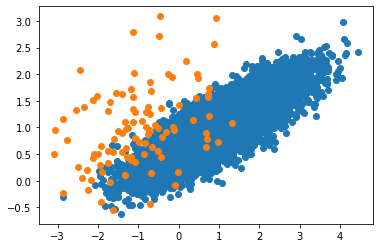

In [23]:
X_df = pd.DataFrame(X)
X_df['label'] = y
plt.scatter(x=X_df[X_df.label==0][0], y=X_df[X_df.label==0][1])
plt.scatter(x=X_df[X_df.label==1][0], y=X_df[X_df.label==1][1])

### Using SMOTE for over-sampling

In [27]:
oversample = imblearn.over_sampling.SMOTE()
X,y = oversample.fit_resample(X,y)

1    9900
0    9900
Name: label, dtype: int64

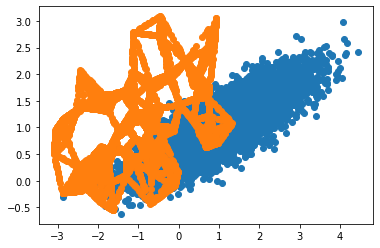

In [30]:
X_df = pd.DataFrame(X)
X_df['label'] = y
plt.scatter(x=X_df[X_df.label==0][0], y=X_df[X_df.label==0][1])
plt.scatter(x=X_df[X_df.label==1][0], y=X_df[X_df.label==1][1])
X_df['label'].value_counts()

### Random undersampling

In [33]:
over = imblearn.over_sampling.SMOTE(sampling_strategy=0.1) #10 percent of the majority
under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.5) #50% larger than minority

In [35]:
# Use pipeline to store them
steps = [
    ('o',over),
    ('u',under)
]
pipeline = imblearn.pipeline.Pipeline(steps=steps)

In [37]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
X,y = pipeline.fit_resample(X,y)

0    1980
1     990
Name: label, dtype: int64

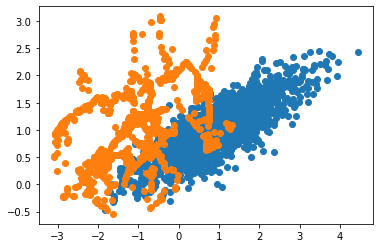

In [38]:
X_df = pd.DataFrame(X)
X_df['label'] = y
plt.scatter(x=X_df[X_df.label==0][0], y=X_df[X_df.label==0][1])
plt.scatter(x=X_df[X_df.label==1][0], y=X_df[X_df.label==1][1])
X_df['label'].value_counts()

In [39]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.769


In [43]:
steps2 = [
    ('o',over),
    ('u',under),
    ('model',DecisionTreeClassifier())
]
pipeline2 = imblearn.pipeline.Pipeline(steps=steps2)

In [44]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline2, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.841


# Parameter we can tune

- Different ratios of the minority class and majority class.
- K-nearest neighbors selected in SMOTE, default k=5.

# Borderline SMOTE

### Introduction
- Select the instances of the minority class that are misclassified, and then oversamle just those difficult instances, to provide a more resolution only where it may be required.
- These example are on the border or edge of decision boundary where classes may overlap, the SMOTE modified for this is called Borderline SMOTE.
- The authors also described a version of the method that oversample the majority class for those cause a misclassification, is called Borderline-SMOTE1. 
- The method where oversampling just the borderline casese in miniority class is called Borderline-SMOTE2.

## Applying Borderline-SMOTE1
- library: BorderlineSMOTE class from imbalanced learn.

In [47]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
import numpy as np

In [49]:
# Make the dataset
X, y = make_classification(n_samples=10000,
                          n_features=2,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          weights=[0.99],
                          flip_y=0,
                          random_state=1)

In [50]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Counter({0: 9900, 1: 9900})


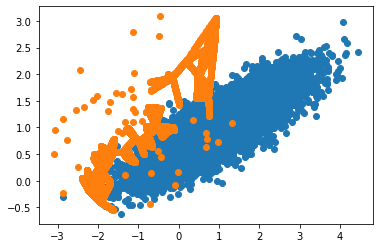

In [53]:
# Transform the dataset
oversample = BorderlineSMOTE()
X , y = oversample.fit_sample(X, y)

# count
counter = Counter(y)
print(counter)

#Scatter
X_df = pd.DataFrame(X)
X_df['label'] = y
for i in [0,1]:
    plt.scatter(x=X_df[X_df.label==i][0], y=X_df[X_df.label==i][1])
plt.show()

- The plot shows that the sample from the decision boundary would not be oversampled.
- Also those are difficlut to classify because of overlap would not be oversampled.

# Borderline-SMOTE SVM

- Use SVM algorithm instead of a KNN to identify the misclassified examples on the decision boundary.
- WE can use SVMSMOTE class from the imblanced-learn library.

In [54]:
from imblearn.over_sampling import SVMSMOTE

In [72]:
# Make the dataset
X, y = make_classification(n_samples=10000,
                          n_features=2,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          weights=[0.99],
                          flip_y=0,
                          random_state=1)

In [73]:
counter = Counter(y)
print(counter)
oversample = SVMSMOTE()
X3 , y3 = oversample.fit_resample(X ,y)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 100})


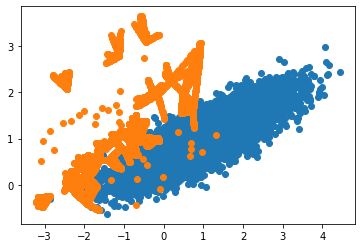

In [74]:
#Scatter
X_df = pd.DataFrame(X3)
X_df['label'] = y3
for i in [0,1]:
    plt.scatter(x=X_df[X_df.label==i][0], y=X_df[X_df.label==i][1])
plt.show()

In [75]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X3, y3, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.992


# Adaptive Synthetic sample (ADASYN)

- Generate more synthetic examples in regions of the feature space where the density of minority exmaples is low, and fewer on where the density is high.

In [60]:
from imblearn.over_sampling import ADASYN

In [68]:
# Make the dataset
X, y = make_classification(n_samples=10000,
                          n_features=2,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          weights=[0.99],
                          flip_y=0,
                          random_state=1)

In [69]:
counter = Counter(y)
print(counter)
oversample = ADASYN()
X2 , y2 = oversample.fit_resample(X ,y)
counter = Counter(y2)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


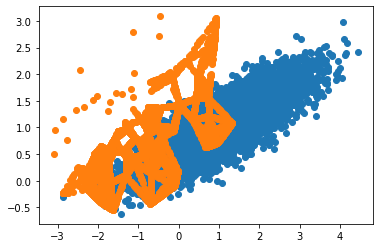

In [70]:
#Scatter
X_df = pd.DataFrame(X2)
X_df['label'] = y2
for i in [0,1]:
    plt.scatter(x=X_df[X_df.label==i][0], y=X_df[X_df.label==i][1])
plt.show()

In [71]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X2, y2, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.926
